# Part 1: Introduct to TensorFlow

## 0.1 Install TensorFlow
这部分介绍TensorFlow的基本操作.

启用TensorFlow，如果直接用 `pip install tensorflow` 默认安装的就是cpu版本的，安装GPU版本的 `pip install tensorflow-gpu`，使用Anaconda可以将 `pip` 换为 `conda` 或 `mamba` 进行安装.

还需使用 `mitdeeplearning` 相关库文件，需要三步操作：

1. 执行 `pip install mitdeeplearning`.

2. 到 [github - introtodeeplearning](https://github.com/aamini/introtodeeplearning) 下载该项目，解压后，到该目录下找到 `setup.py` 文件，使用命令行 `python setup.py install` 对其进行安装

3. 完成相关包的补全. 先运行代码，看是否报错，如果报错看缺少哪个包就装哪个. 例如我就缺少 `cv2` 这个包，需要 `pip installl opencv-python`.

In [1]:
import tensorflow as tf
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt
print('TensoFlow Version:', tf.__version__)

TensoFlow Version: 2.6.0


## 1.1 Why TensorFlow called TensorFlow?

TensorFlow之所以称为TensorFlow是因为它是以**流式处理**(Flow)张量数据类型(Tensors)，tensor是TensorFlow中的基础数据类型，它本质就是一种高维的数组.

定义：**每一维内数据的形状是相同的，并且元素具有相同的数据类型**的数组，称为tensor-like.

`np.ndarray` 就是一种 `tensor-like` 数据类型，数组中元素的数据类型可以是 `string` 或 `int` 或 `float` 等等.

`Tensor` 类支持与 `np.ndarray` 类的相互转换.

- `tensor.nupmy()` 将 `Tensor` 转为 `np.ndarray`.

- `tf.constant(value)`：其中 `value` 为 `tensor-like` 对象（就是满足张量性质的），可以将 `np.ndarray` 转为**常量类型**的 `tensor`.

- `tf.Variable(value)`：与 `tf.constant(value)` 完全一致，只是返回**变量类型**的 `tensor`.

其实就是将向量($n\times 1$)，矩阵($n\times m$)泛化到更高维度，可以理解为“堆叠”.

- 如三维就是矩阵的堆叠($k\times n\times m$)，就是 $k$ 个$ nxm$ 的矩阵的堆叠.

Tensor最根本的性质就是形状(`shape`)，也就是Tensor在每一维上的大小，`rank`表示Tensor的维数 $n$，我们以后将 $n$ 维张量简记为 n-d Tensor.

In [2]:
# tensor和np.ndarray相互转换
array = np.array([1, 2, 3])
tensor = tf.constant(array)
var_tensor = tf.Variable(array)
print(type(tensor))
print(type(var_tensor))
print(type(tensor.numpy()))
print(type(var_tensor.numpy()))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


首先看看标量(scalar)，也就是 0-d Tensor.

- `tf.rank(tensor)`：返回 `tensor` 的 `rank` 值.

- `tf.shape(tensor)`：返回 `tensor` 的 `shape`.

In [3]:
sport = tf.constant('Badminton')
number = tf.constant(3.1415926)
print("'sport' is a {}-d Tensor".format(tf.rank(sport)))
print("'number' is a {}-d Tensor".format(tf.rank(number)))

'sport' is a 0-d Tensor
'number' is a 0-d Tensor


向量(Vectors)为 1-d Tensor.

In [4]:
sport = tf.constant(['Badminton', 'Tennis'])
number = tf.constant([3.1415926, 1.414213, 2.71821])
print("'sport' is a {}-d Tensor with shape: {}".format(tf.rank(sport), tf.shape(sport)))
print("'number' is a {}-d Tensor with shape: {}".format(tf.rank(number), tf.shape(number)))

'sport' is a 1-d Tensor with shape: [2]
'number' is a 1-d Tensor with shape: [3]


矩阵(Matrix)为 2-d Tensor.

In [5]:
matrix = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("'matrix' is a {}-d Tensor with shape: {}".format(tf.rank(matrix), tf.shape(matrix)))

'matrix' is a 2-d Tensor with shape: [3 3]


3-d Tensor，可以表示一张RGB三通道图片.

- `tf.zeros(shape)`：`shape` 一个由整数构成的向量，可以是list, tuple, 1-d Tensor 数据类型，返回一个元素全部为 $0$ 的形状满足 `shape` 要求的 tensor.

In [6]:
image = tf.zeros([256, 256, 3])  # 256*256 像素的3通道图片
print("'image' is a {}-d Tensor with shape: {}".format(tf.rank(image), tf.shape(image)))

'image' is a 3-d Tensor with shape: [256 256   3]


4-d Tensor，可以表示多张RGB三通道图片.

In [7]:
images = tf.zeros([10, 256, 256, 3])  # 10张256*256 像素的3通道图片
print("'images' is a {}-d Tensor with shape: {}".format(tf.rank(images), tf.shape(images)))

'images' is a 4-d Tensor with shape: [ 10 256 256   3]


与 `np.ndarray` 一样，我们可以对tensor取切片(slicing). 重新修改大小

- `tf.reshape(tensor, shape)`：将 `tensor` 中的元素重新顺次排列为 `shape` 的形式. 需要保证 `shape` 的大小和 `tensor` 的元素个数相同. 当 `shape` 中有 `-1` 时，表示根据原 `tensor` 的元素个数自动计算补全该维度.

In [8]:
print(tf.shape(images[:, :, 0:10, :]).numpy())
print(tf.shape(tf.reshape(images, [1, 2, 3, -1])).numpy())  # 最后一个维度的元素个数为自动计算的

[ 10 256  10   3]
[     1      2      3 327680]


## 1.2 Computations on Tensors

TensorFlow主要计算tensors之间的运算，本质也就是创建一个计算图(Computation Graph)，它是由tensors之间的运算关系构成的边，tensors构成的点，下面是一个简单的例子.

- `tf.add(tensor1, tensor2)`：

![](./img/add-graph.png)

In [9]:
a = tf.constant(15)
b = tf.constant(20)

c1 = tf.add(a, b)
c2 = a + b  # 和 tf.add 具有相同的效果
print(c1, c2, sep='\n')

tf.Tensor(35, shape=(), dtype=int32)
tf.Tensor(35, shape=(), dtype=int32)


当我们创建一个计算图时，它是一个计算关系，而不一定直接对变量进行计算，需要代值进行计算（即函数），例如下面这个例子：
![](./img/computation-graph.png)

In [10]:
def func(a, b):
    c = a + b
    d = b - 1
    e = c * d
    return e

接下来通过调用该函数，从而使用输入的 `a, b` 执行该计算图.

In [11]:
a, b = 1.5, 2.5
e_out = func(a, b)
print(e_out)

6.0


## 1.3 Neual networks in TensorFlow

我们可以进一步在TensorFlow中定义神经网络，TensorFlow使用Keras这个高级API，用于搭建和训练神经网络模型.

我们先考虑一个简单的感知器(perceptron)，通过一个紧密层 $y=\sigma(Wx+b)$，其中 $W$ 为权重矩阵(matrix of weights)，$b$ 为偏置(bias)，$x$ 为输入(input)，$\sigma$ 为sigmoid激活函数(activation function)，$y$ 为输出(output). 计算图如下图所示：

![perceptron](./img/computation-graph-2.png)

tensors可以通过layers进行流式传播，layers也就是神经网络的基本模块. layers是神经网络中的基本操作，用于**更新权重，计算losses，定义层之间的联机**. 我们从定义一个 `layer` 来实现上述的perceptron.

实现方式为通过继承 `tf.keras.layers.Layer` 对象，其需要包含以下的方法:

- `__init__(self, *args)`：定义自定义层的属性，如设定输出的维数；并调用 `super().__init__()` 执行父类的初始化方法.

- `build(self, input_shape)`：该方法用于创建与改layer相关的权重变量，利用 `self.add_weight()` 可以为当前层添加权重变量.
  `add_weight(name=None, shape=None, ...)`：父类的方法，`name` 为该权重变量的名称，`shape` 为该权重变量的形状.

- `call(self, inputs, *args, **kwargs)`： 构建计算图，在 `build()` 定义后进行定义，当调用 `__call__` （也就是将类作为函数进行调用）时会调用该函数.

这里推荐使用Pycharm写核心代码然后用 `load "filename.py"` 将文件加载到Jupyter中，效率更高.

使用CPU版本tensorflow就不会报错，而使用GPU版本的tensorflow则会报错了，但是误差非常的小，应该是判断的精度上有些错误.

In [12]:
# %load "Custom Dense Layer.py"

### Defining a network Layer ###
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(layers.Layer):
    def __init__(self, n_output_nodes):  # defines custom layer attributes
        super().__init__()
        self.W, self.b = None, None
        self.n_output_nodes = n_output_nodes

    def build(self, input_shape):
        d = int(input_shape[-1])  # input_shape dimensionality
        self.W = self.add_weight('weight', [d, self.n_output_nodes])  # matrix of weights
        self.b = self.add_weight('bias', [1, self.n_output_nodes])  # bias

    def call(self, x):  # set computation graph
        x = tf.cast(x, tf.float32)  # tensor之间的运算必须为 tf.float32 数据类型
        z = x @ self.W + self.b
        y = keras.activations.sigmoid(z)
        return y

# Since layers parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2]])
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)
#layer.W

[[0.26978594 0.45750415 0.66536945]]
[PASS] test_custom_dense_layer_output


True

上述全连接层可以用一个 `tf.keras.layers.Dense` 等价实现

- `tf.keras.layers.Dense(units, input_shape=(n, m))`：`units` 为该全连接层的神经元个数，`input_shape` 为输入张量的形状.

In [13]:
dense_layer = layers.Dense(3, activation='sigmoid')  # OurDenseLayer 的等价形式
print(dense_layer(x_input))

tf.Tensor([[0.5607363  0.65668976 0.12496966]], shape=(1, 3), dtype=float32)


使用 `tf.keras.Sequential` 还可以对多个 `layer` 进行堆叠.

In [14]:
### Defining a neural network using the Sequential API ###


# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = tf.keras.Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = layers.Dense(n_output_nodes)

# Add the dense layer to the model
model.add(dense_layer)
    
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input)
print(f"model_output: {model_output.numpy()}")

model_output: [[ 0.62118787 -0.08692831  1.6387595 ]]


类似的也可以自定义Model，通过继承 [`tf.keras.Model`](https://tensorflow.google.cn/api_docs/python/tf/keras/Model?hl=en)，只需实现两个函数 `__init__` 初始化和 `call` 执行模型函数. 自定义一个带有 `isidentity` 参数的Model，若 `isidentity=True` 则直接返回输入变量，否则返回经过一个全连接层的结果.

In [15]:
class IdentityModel(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense_layer = layers.Dense(units, activation='sigmoid')
    
    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        if isidentity:
            return inputs
        return x

n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
out_activate = model(x_input)
out_identity = model(x_input, isidentity=True)

print(f"Network output with activation: {out_activate};\nNetwork identity output: {out_identity}")

Network output with activation: [[0.29996255 0.62776643 0.48460072]];
Network identity output: [[1. 2.]]


## 1.4 Automatic differentiation in TensorFlow

自动微分是TensorFlow中非常重要的一部分，用于反向传播时使用梯度下降法对可学习参数进行更新，从而减小loss值，下面是一个例子（来源神经网络与深度学习 邱锡鹏 P97）
![神经网络与深度学习 邱锡鹏 P97](./img/神经网络与深度学习-邱锡鹏.png)

其实就是可以实现程序自动求导的过程，把计算式展开成一个带状，然后利用链式法则，从后到前逐项求导（求梯度），所以形象称为Gradient Tape. 下面让我们试试TensorFlow中的自动微分功能 [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable).

比如我们要求 $y = \frac{1}{x^2}$ 在 $x = 2$ 处的导数值 $y'(2) = -\frac{1}{4}$，使用方法如下：

In [16]:
### Gradient computation with GradientTape ###
# y = 1/(x^2)
x = tf.Variable(2.)

# initiate a gradient tape
with tf.GradientTape() as tape:
    # Define the function
    y = 1 / x ** 2
# Access the gradient -- derivative of y with respect to x（y 对 x 的导数）
dy_dx = tape.gradient(y, x)
print(f"dy_dx: {dy_dx.numpy()}")

dy_dx: -0.25


当我们进行神经网络训练时，可以视为最小化损失函数 $\mathcal{L(y, \hat{y})}$ 的最优化问题，将每个可学习参数都对Loss函数求梯度，然后使用随机梯度下降法(stochastic gradient descent, SGD)，对可学习参数在负梯度方向乘上学习因子 $\mu$ 进行更新. 也就是，设 $W$ 为可学习参数，则每次更新为 $W' = W - \mu \cdot \frac{\partial L}{\partial W}$.

比如我们现在的可学习参数为 $x$，Loss函数为 $\mathcal{L} = (x - y)^2$，其中 $y$ 是一个常量. 显然当 $x=y$ 时，$\mathcal{L}$ 有最小值 $0$，下面让我们梯度下降法对其进行求解.

下面代码中有一个细节，由于求梯度必须要求变量为 `tf.Variable` 类，而 `tf.Variable` 有一种特殊的赋值方法 `tf.Variable.assign(value)` 可以将变量赋值为 `value` 且还能保持为 `tf.Variable` 类，等价于 `x = tf.Variable(value)`.

Initializing x=[[-1.1771783]]


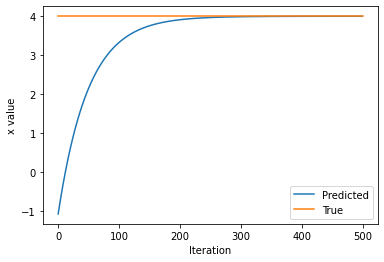

In [17]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for out initial x
x = tf.Variable([tf.random.normal([1])])  # Outputs random values from a normal distribution
print(f"Initializing x={x.numpy()}")

learning_rate = 1e-2  # learning rate for SGD
history = []  # memory the change of x
# Define the target value
y = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
# compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - y) ** 2
    grad = tape.gradient(loss, x)  # comput the derivative of the loss with respect to x
    x.assign(x - learning_rate * grad)  # update the value of x
    #x = x - learning_rate * grad  # can't use it, it will change x to tf.constant but not tf.Variable
    history.append(x.numpy()[0])
    
# Plot the evolution of x as we optimize towards y!
plt.plot(history, label='Predicted')
plt.plot([0, 500], [y, y], label='True')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()